In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./Pandas-Data-Science-Tasks-master/SalesAnalysis/Supermart Grocery Sales - Retail Analytics Dataset.csv")
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [2]:
results = df.groupby('Region').sum()
results

C:\Users\Ирина\AppData\Local\Temp\ipykernel_19716\2540047821.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = df.groupby('Region').sum()


,Sales,Discount,Profit
Region,,,
Central,3468156,531.33,856806.84
East,4248368,648.41,1074345.58
North,1254,0.12,401.28
South,2440461,367.15,623562.89
West,4798743,719.80,1192004.61


Text(0.5, 0, 'Region')

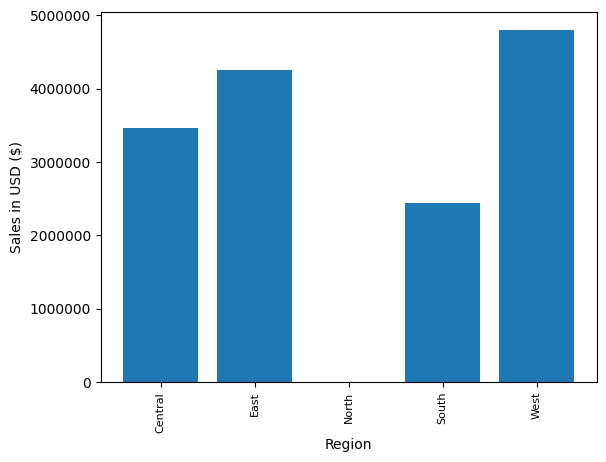

In [3]:
region = [region for region, df in df.groupby('Region')]

fig, ax = plt.subplots()
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

plt.bar(region, results['Sales'])
plt.xticks(region, rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Region')

Text(0.5, 0, 'Region')

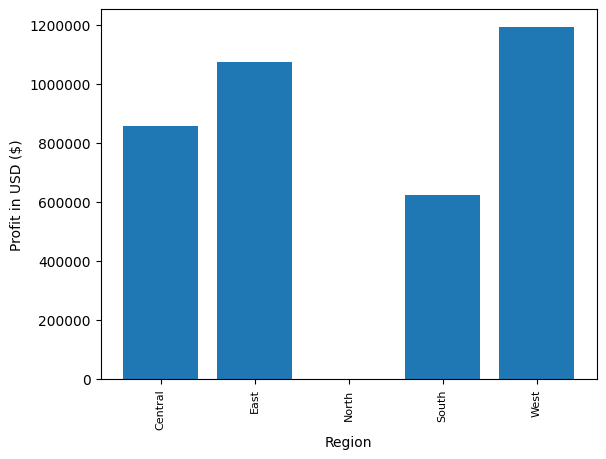

In [4]:
region = [region for region, df in df.groupby('Region')]

fig, ax = plt.subplots()
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

plt.bar(region, results['Profit'])
plt.xticks(region, rotation = 'vertical', size = 8)
plt.ylabel('Profit in USD ($)')
plt.xlabel('Region')

In [5]:
results = df.groupby('Category').sum()
results

C:\Users\Ирина\AppData\Local\Temp\ipykernel_19716\1185926465.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = df.groupby('Category').sum()


,Sales,Discount,Profit
Category,,,
Bakery,2112281,318.53,528521.06
Beverages,2085313,322.46,525605.76
"Eggs, Meat & Fish",2267401,339.41,567357.22
Food Grains,2115272,319.51,529162.64
Fruits & Veggies,2100727,325.14,530400.38
Oil & Masala,2038442,305.58,497895.29
Snacks,2237546,336.18,568178.85


Text(0.5, 0, 'Category')

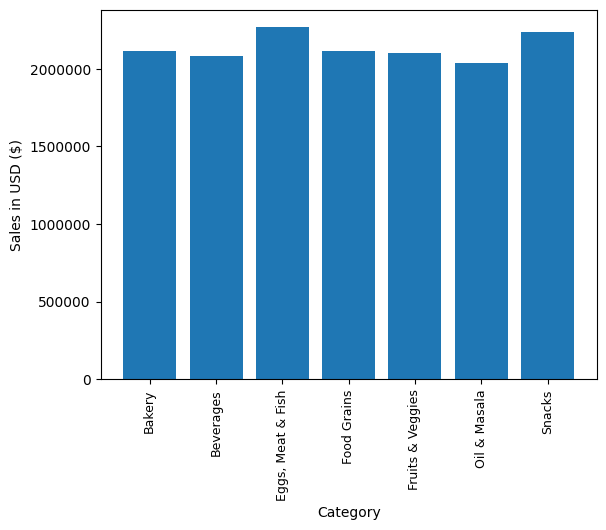

In [6]:
category = [category for category, df in df.groupby('Category')]

fig, ax = plt.subplots()
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

plt.bar(category, results['Sales'])
plt.xticks(category, rotation = 'vertical', size = 9)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Category')

In [7]:
results = df.groupby('Category', group_keys=True).apply(lambda x: x)
results

Order ID Customer Name Category Sub Category         City  \
Category                                                                  
Bakery   8         OD9         Hafiz   Bakery     Biscuits  Tirunelveli   
         9        OD10      Krithika   Bakery        Cakes      Chennai   
         16       OD17          Alan   Bakery        Cakes   Dharmapuri   
         27       OD28       Jackson   Bakery     Biscuits   Viluppuram   
         44       OD45        Amrish   Bakery     Biscuits  Krishnagiri   
...                ...           ...      ...          ...          ...   
Snacks   9971   OD9972       Ridhesh   Snacks      Noodles   Perambalur   
         9972   OD9973         Vinne   Snacks   Chocolates   Perambalur   
         9973   OD9974         Surya   Snacks      Cookies        Karur   
         9978   OD9979        Roshan   Snacks      Cookies       Cumbum   
         9988   OD9989       Jackson   Snacks      Cookies      Vellore   

               Order Date   Region  Sales  Discount  Profit       State  
Category                                                                 
Bakery   8     06-09-2015     West    791      0.23  181.93  Tamil Nadu  
         9     06-09-2015     West   1795      0.27  484.65  Tamil Nadu  
         16    11-11-2015  Central   1678      0.28  318.82  Tamil Nadu  
         27     9/17/2016     East    979      0.22  401.39  Tamil Nadu  
         44    03-11-2017  Central   1663      0.17  731.72  Tamil Nadu  
...                   ...      ...    ...       ...     ...         ...  
Snacks   9971  10-02-2018     West    940      0.22  253.80  Tamil Nadu  
         9972   2/20/2018     West   2500      0.19  325.00  Tamil Nadu  
         9973  05-05-2017     West   2377      0.14  237.70  Tamil Nadu  
         9978   3/19/2016     West   1195      0.16  250.95  Tamil Nadu  
         9988  11-03-2016     West   1460      0.15  452.60  Tamil Nadu  

[9994 rows x 11 columns]

In [8]:
results = df.groupby('Sub Category').sum()
results

C:\Users\Ирина\AppData\Local\Temp\ipykernel_19716\1742193207.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = df.groupby('Sub Category').sum()


,Sales,Discount,Profit
Sub Category,,,
Atta & Flour,534649,80.44,127861.10
Biscuits,684083,103.29,169357.62
Breads & Buns,742586,113.70,190764.98
Cakes,685612,101.54,168398.46
Chicken,520497,79.66,124049.89
Chocolates,733898,112.60,183849.34
Cookies,768213,113.72,190643.70
Dals & Pulses,523371,77.51,130232.29
Edible Oil & Ghee,668086,103.51,168593.58


In [9]:
print(df['Sub Category'].unique())

['Masalas' 'Health Drinks' 'Atta & Flour' 'Fresh Vegetables'
 'Organic Staples' 'Fresh Fruits' 'Biscuits' 'Cakes' 'Chocolates' 'Eggs'
 'Cookies' 'Chicken' 'Edible Oil & Ghee' 'Mutton' 'Soft Drinks'
 'Dals & Pulses' 'Organic Vegetables' 'Noodles' 'Organic Fruits' 'Fish'
 'Spices' 'Rice' 'Breads & Buns']


In [25]:
print(df['Sub Category'].value_counts())

Health Drinks         719
Soft Drinks           681
Cookies               520
Breads & Buns         502
Chocolates            499
Noodles               495
Masalas               463
Biscuits              459
Cakes                 452
Edible Oil & Ghee     451
Spices                447
Mutton                394
Eggs                  379
Organic Staples       372
Fresh Fruits          369
Fish                  369
Fresh Vegetables      354
Atta & Flour          353
Organic Fruits        348
Chicken               348
Organic Vegetables    347
Dals & Pulses         343
Rice                  330
Name: Sub Category, dtype: int64


In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu


In [12]:
df['Month'] = df['Order Date'].dt.month
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Month
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,11
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,11
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,6
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,10
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,10


In [13]:
results = df.groupby('Month').sum()
results

C:\Users\Ирина\AppData\Local\Temp\ipykernel_19716\4082709524.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = df.groupby('Month').sum()


,Sales,Discount,Profit
Month,,,
1,577972,85.74,142518.52
2,456102,65.71,116082.21
3,1053980,158.66,267347.33
4,998453,152.52,247476.97
5,1086920,165.16,263643.40
6,1057808,164.01,263296.16
7,1089385,163.20,274594.57
8,1046807,159.77,258912.09
9,2064266,314.17,517788.56


In [14]:
season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'Spring', 
               4: 'Spring',
               5: 'Spring',
               6: 'Summer',
               7: 'Summer',
               8: 'Summer',
               9: 'Fall',
               10: 'Fall',
               11: 'Fall',
               12: 'Winter'}
df['Season'] = df['Month'].apply(lambda x: season_dict[x])
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Month,Season
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,11,Fall
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,11,Fall
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,6,Summer
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,10,Fall
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,10,Fall


In [15]:
results = df.groupby('Season').sum()
results

C:\Users\Ирина\AppData\Local\Temp\ipykernel_19716\158031198.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = df.groupby('Season').sum()


,Sales,Discount,Profit,Month
Season,,,,
Fall,5501479,835.44,1383213.51,36818
Spring,3139353,476.34,778467.70,8435
Summer,3194000,486.98,796802.82,14920
Winter,3122150,468.05,788637.17,17877


In [16]:
print(df.groupby(['Category','Sub Category'])['Sales'].count())


Category           Sub Category      
Bakery             Biscuits              459
                   Breads & Buns         502
                   Cakes                 452
Beverages          Health Drinks         719
                   Soft Drinks           681
Eggs, Meat & Fish  Chicken               348
                   Eggs                  379
                   Fish                  369
                   Mutton                394
Food Grains        Atta & Flour          353
                   Dals & Pulses         343
                   Organic Staples       372
                   Rice                  330
Fruits & Veggies   Fresh Fruits          369
                   Fresh Vegetables      354
                   Organic Fruits        348
                   Organic Vegetables    347
Oil & Masala       Edible Oil & Ghee     451
                   Masalas               463
                   Spices                447
Snacks             Chocolates            499
                 

In [57]:
pd.set_option('display.max_rows', None)

print(df.groupby(['Region','Sub Category'])['Sales'].count())

Region   Sub Category      
Central  Atta & Flour           72
         Biscuits               89
         Breads & Buns         110
         Cakes                 110
         Chicken                87
         Chocolates            125
         Cookies               110
         Dals & Pulses          82
         Edible Oil & Ghee     123
         Eggs                   83
         Fish                   84
         Fresh Fruits           91
         Fresh Vegetables       98
         Health Drinks         168
         Masalas                78
         Mutton                 77
         Noodles               140
         Organic Fruits         77
         Organic Staples        84
         Organic Vegetables     89
         Rice                   72
         Soft Drinks           175
         Spices                 99
East     Atta & Flour           96
         Biscuits              130
         Breads & Buns         149
         Cakes                 113
         Chicken           

In [27]:
print(df.groupby(['Region','Sub Category'])['Sales'].count())
print(93)

Region   Sub Category      
Central  Atta & Flour           72
         Biscuits               89
         Breads & Buns         110
         Cakes                 110
         Chicken                87
                              ... 
West     Organic Staples       114
         Organic Vegetables    104
         Rice                  111
         Soft Drinks           206
         Spices                159
Name: Sales, Length: 93, dtype: int64
93


In [17]:
df['Category'].describe()

count       9994
unique         7
top       Snacks
freq        1514
Name: Category, dtype: object

In [18]:
category_pivot = pd.pivot_table(columns = ['Category','Sub Category'], values = 'Sales', data = df, aggfunc = 'sum')

category_pivot = category_pivot.transpose()

category_pivot



Sales
Category          Sub Category               
Bakery            Biscuits             684083
                  Breads & Buns        742586
                  Cakes                685612
Beverages         Health Drinks       1051439
                  Soft Drinks         1033874
Eggs, Meat & Fish Chicken              520497
                  Eggs                 575156
                  Fish                 560548
                  Mutton               611200
Food Grains       Atta & Flour         534649
                  Dals & Pulses        523371
                  Organic Staples      558929
                  Rice                 498323
Fruits & Veggies  Fresh Fruits         551212
                  Fresh Vegetables     525842
                  Organic Fruits       503402
                  Organic Vegetables   520271
Oil & Masala      Edible Oil & Ghee    668086
                  Masalas              697480
                  Spices               672876
Snacks            Chocolates           733898
                  Cookies              768213
                  Noodles              735435

In [28]:
category_pivot.sort_values(by=['Category','Sales'], ascending=False)

Sales
Category          Sub Category               
Snacks            Cookies              768213
                  Noodles              735435
                  Chocolates           733898
Oil & Masala      Masalas              697480
                  Spices               672876
                  Edible Oil & Ghee    668086
Fruits & Veggies  Fresh Fruits         551212
                  Fresh Vegetables     525842
                  Organic Vegetables   520271
                  Organic Fruits       503402
Food Grains       Organic Staples      558929
                  Atta & Flour         534649
                  Dals & Pulses        523371
                  Rice                 498323
Eggs, Meat & Fish Mutton               611200
                  Eggs                 575156
                  Fish                 560548
                  Chicken              520497
Beverages         Health Drinks       1051439
                  Soft Drinks         1033874
Bakery            Breads & Buns        742586
                  Cakes                685612
                  Biscuits             684083

In [53]:
region_pivot = pd.pivot_table(columns = ['Region','Sub Category'], values = 'Sales', data = df, aggfunc = 'sum')

region_pivot = region_pivot.transpose()

region_pivot

Sales
Region  Sub Category              
Central Atta & Flour        104772
        Biscuits            128705
        Breads & Buns       158804
        Cakes               160834
        Chicken             139238
        Chocolates          192686
        Cookies             165978
        Dals & Pulses       123955
        Edible Oil & Ghee   181516
        Eggs                126081
        Fish                126717
        Fresh Fruits        139585
        Fresh Vegetables    144098
        Health Drinks       244395
        Masalas             125669
        Mutton              124606
        Noodles             199830
        Organic Fruits      112303
        Organic Staples     124869
        Organic Vegetables  130521
        Rice                110087
        Soft Drinks         256799
        Spices              146108
East    Atta & Flour        151615
        Biscuits            203353
        Breads & Buns       218736
        Cakes               166152
        Chicken             144515
        Chocolates          201726
        Cookies             217861
        Dals & Pulses       131558
        Edible Oil & Ghee   188351
        Eggs                179825
        Fish                177097
        Fresh Fruits        153112
        Fresh Vegetables    148063
        Health Drinks       291464
        Masalas             224779
        Mutton              176393
        Noodles             200328
        Organic Fruits      135276
        Organic Staples     185681
        Organic Vegetables  127786
        Rice                130014
        Soft Drinks         285742
        Spices              208941
North   Masalas               1254
South   Atta & Flour         96374
        Biscuits            122991
        Breads & Buns       116074
        Cakes               122320
        Chicken              80315
        Chocolates          116113
        Cookies             126807
        Dals & Pulses        92354
        Edible Oil & Ghee   110750
        Eggs                 88326
        Fish                 85231
        Fresh Fruits         86200
        Fresh Vegetables     82361
        Health Drinks       173696
        Masalas             106100
        Mutton              107091
        Noodles             126437
        Organic Fruits       84018
        Organic Staples      79848
        Organic Vegetables   99583
        Rice                 84493
        Soft Drinks         170970
        Spices               82009
West    Atta & Flour        181888
        Biscuits            229034
        Breads & Buns       248972
        Cakes               236306
        Chicken             156429
        Chocolates          223373
        Cookies             257567
        Dals & Pulses       175504
        Edible Oil & Ghee   187469
        Eggs                180924
        Fish                171503
        Fresh Fruits        172315
        Fresh Vegetables    151320
        Health Drinks       341884
        Masalas             239678
        Mutton              203110
        Noodles             208840
        Organic Fruits      171805
        Organic Staples     168531
        Organic Vegetables  162381
        Rice                173729
        Soft Drinks         320363
        Spices              235818

In [55]:
region_pivot.sort_values(by=['Region','Sales'], ascending=False)

pd.set_option('display.max_rows', None)
print(region_pivot)

                             Sales
Region  Sub Category              
Central Atta & Flour        104772
        Biscuits            128705
        Breads & Buns       158804
        Cakes               160834
        Chicken             139238
        Chocolates          192686
        Cookies             165978
        Dals & Pulses       123955
        Edible Oil & Ghee   181516
        Eggs                126081
        Fish                126717
        Fresh Fruits        139585
        Fresh Vegetables    144098
        Health Drinks       244395
        Masalas             125669
        Mutton              124606
        Noodles             199830
        Organic Fruits      112303
        Organic Staples     124869
        Organic Vegetables  130521
        Rice                110087
        Soft Drinks         256799
        Spices              146108
East    Atta & Flour        151615
        Biscuits            203353
        Breads & Buns       218736
        Cakes       

In [31]:
df.groupby(['Region','Sub Category']).agg({'Sales': ['sum']})

Sales
                               sum
Region  Sub Category              
Central Atta & Flour        104772
        Biscuits            128705
        Breads & Buns       158804
        Cakes               160834
        Chicken             139238
...                            ...
West    Organic Staples     168531
        Organic Vegetables  162381
        Rice                173729
        Soft Drinks         320363
        Spices              235818

[93 rows x 1 columns]